In [51]:
##!pip install networkx
##!pip install scipy
##!pip install matplotlib

In [52]:
import tweepy
import webbrowser
import time
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [53]:
consumer_key = "HO24YC3OXsclTklb9q91rPstc"
consumer_secret = "L4AlvJI2ClgptTEdlHNmgYTgqbrbsjECS9tSySRNiVH5aaLTej"
callback_uri = 'oob' 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret, callback_uri)
redirect_url = auth.get_authorization_url()
webbrowser.open(redirect_url)
user_pin_input = input("What's the pin value? ")
auth.get_access_token(user_pin_input)

What's the pin value? 2261014


('486977981-9vqd1VTICsY4i1HOFC0eBkvU2JUUXuxmjMS6nwwa',
 'MTNvx5Fuula5Bqwo0iEqP0XMXB5nSgWipbTxtuAw4H4e3')

In [54]:
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, compression=True)

In [55]:
me = api.get_user(screen_name = 'MrFlantastic')

In [56]:
me.id

486977981

In [57]:
user_list = ["486977981"]
follower_list = []
for user in user_list:
    followers = []
    try:
        for page in tweepy.Cursor(api.followers_ids, user_id=user).pages():
            followers.extend(page)
            print(len(followers))
    except tweepy.TweepError:
        print("error")
        continue
    follower_list.append(followers)

780


In [58]:
df = pd.DataFrame(columns=['source','target']) #Empty DataFrame
df['target'] = follower_list[0] #Set the list of followers as the target column
df['source'] = 486977981 #Set my user ID as the source 

In [59]:
G = nx.from_pandas_edgelist(df, 'source', 'target') #Turn df into graph
pos = nx.spring_layout(G) #specify layout for visual

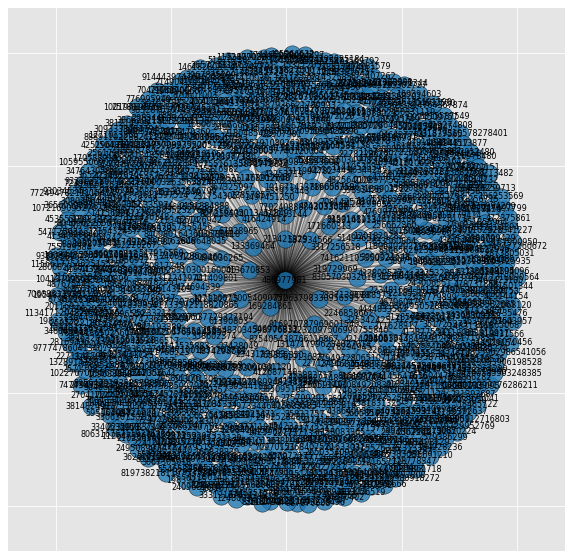

In [60]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10, 10))
plt.style.use('ggplot')
nodes = nx.draw_networkx_nodes(G, pos,
                               alpha=0.8)
nodes.set_edgecolor('k')
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.2)

In [ ]:
user_list = list(df['target']) #Use the list of followers we extracted in the code above i.e. my 780 followers
for userID in user_list:
    print(userID)
    followers = []
    follower_list = []

    # fetching the user
    user = api.get_user(userID)

   # fetching the followers_count
    followers_count = user.followers_count

    try:
        for page in tweepy.Cursor(api.followers_ids, user_id=userID).pages():
            followers.extend(page)
            print(len(followers))
            if followers_count >= 5000: #Only take first 5000 followers
                break
    except tweepy.TweepError:
        print("error")
        continue
    follower_list.append(followers)
    temp = pd.DataFrame(columns=['source', 'target'])
    temp['target'] = follower_list[0]
    temp['source'] = userID
    df = df.append(temp)
    df.to_csv("networkOfFollowers.csv")

1404854886538301443
2
1888408500
739
1022707063565082624
3827
1370755198994513926
155
31285669
791
389887281
5000
4833056519
3817
1262898781453869059
366
1413156511124103169
21
450331119
2591
12480032
5000
138456252
402
251234726
error
27561363
256
2155481869


Rate limit reached. Sleeping for: 880


572
4777653615
21
1011055621
1988
277073411
2702
1059550690723405824
2508
61896141
5000
881574490639015936
711
58975906
5000
985287670745088001
3215
38494397
5000
1232097506990755840
260
1372374890112716803
210
1305597779729952769
27
779497280651071488
5000
599457344
165
1259864324564307975


Rate limit reached. Sleeping for: 892


error
551584450
1895
1283083350349983744
44
1366020399176286211
3
4665383681
1277
6014732
4525
1188483034598776832
959
1241532312376029185
19
1347743262942126080
1
2794734235
error
1314717996234027014
875
51070738
94
870601003
642
21926861
1652
3188903222
3596
170588918


Rate limit reached. Sleeping for: 891


101
1048662067656445953
472
92636986
5000
487675441
error
1312816298116542464
23889878
2786
1034492180948238337
69
194283025
983
754327532
225
1101211959414980608
87
895647919352578050
108
2271141799
2197
1134171204829548545
223345733
1715
22681759
1828
1301318636108472320


Rate limit reached. Sleeping for: 890


59
1301139230849208322
29
182962260
302
117342623
374
1177968300854304769
10
1164560585503248385
25
241880362
722
770240888803033088
49
706086339201146881
34
1077431534
698
2388174740
14
1180640202798370816
102
72377364
716
3503725935
60
940547452272332800
27
112332715


Rate limit reached. Sleeping for: 888


664
1192807028873404417
411
526812119
error
1360381742
5000
14156206
2062
1463743201
168
346230561
error
298519505
83
318090564
247
1289757904392925184
13
3620071276
272
153112051
54
4863980955
293
2616312002
191
2731365869
102
28169436


Rate limit reached. Sleeping for: 889


403
3000021648
36
3315526335
441
856656292395483136
39
613683872
3131
916970787969601540
28
2259835274
681
912298764441972737
258
1247570993952051200
118
61390803
192
460585313
error
739550692663123969
105
4235470360
1409
1288927673885097984
170
2301722687
599
933303286098223104


Rate limit reached. Sleeping for: 884


254
1387739790
error
916471001931763714
error
236724075
557
2886799429
109
1141053834
122
184928236
51
34023471
22
19839215
746
15216982
5000
54345833
205
1080482190478266368
351
23857857
76
32178071
593
72396617
542
120589587


Rate limit reached. Sleeping for: 888


error
1077206188352327680
12
157855351
1405
1276676847057555456
2603
1280503967160635394
109
1282732974367281153
49
1639006754
5000
897983519108026368
2660
828306601626968064
1728
325342425
692
912291097560469504
101
21116913
error
1210355962986541056
16
234195043
2112
312745095
5000
1208957706238910464


Rate limit reached. Sleeping for: 888


886
464988798
5000
1193841813976682497
203
126436148
error
1187074857093226496
538
861865068
1034
891715866160750592
5000
1161715949189382144
195
2595722186
206
1167786722681376768
136
1340828340
5000
804696226507669504
43
1165232609133309953
1
2373301624
2
2896103447
50
19823328


Rate limit reached. Sleeping for: 886


27
547125932
38
940344595069640704
1046
1006622748393771009
981
708142578
4522
130012944
382
1209359622
5000
1156733349727260672
14
1136625974236155904
48
1156617754625155072
276
47176191
199
1127235259475611648
252
3317256518
53
770637983309565953
72
286693928
181
4495243283


Rate limit reached. Sleeping for: 872


576
707219405013454849
487
168009390
364
471159384
3593
966696355
error
94141566
5000
169394603
143
1126473869148213252
80
20116932
728
41180571
error
210272666
error
73776463
3215
249999508
1576
24128531
998
346049442
52
815608362


Rate limit reached. Sleeping for: 886


In [ ]:
df = pd.read_csv(“networkOfFollowers.csv”) #Read into a df
G = nx.from_pandas_edgelist(df, 'source', 'target')

In [ ]:
G.number_of_nodes() #Find the total number of nodes in this graph

In [49]:
G_sorted = pd.DataFrame(sorted(G.degree, key=lambda x: x[1], reverse=True))
G_sorted.columns = [‘nconst’,’degree’]
G_sorted.head()

SyntaxError: invalid character in identifier (534111014.py, line 2)

In [50]:
u = api.get_user(XXXXXX)
u.screen_name

NameError: name 'XXXXXX' is not defined

In [ ]:
G_tmp = nx.k_core(G, 10) #Exclude nodes with degree less than 10

In [ ]:
from community import community_louvain
partition = community_louvain.best_partition(G_tmp)
#Turn partition into dataframe
partition1 = pd.DataFrame([partition]).T
partition1 = partition1.reset_index()
partition1.columns = ['names','group']

In [ ]:
G_sorted = pd.DataFrame(sorted(G_tmp.degree, key=lambda x: x[1], reverse=True))
G_sorted.columns = ['names','degree']
G_sorted.head()
dc = G_sorted

In [ ]:
combined = pd.merge(dc,partition1, how='left', left_on="names",right_on="names")

In [ ]:
pos = nx.spring_layout(G_tmp)
f, ax = plt.subplots(figsize=(10, 10))
plt.style.use('ggplot')
#cc = nx.betweenness_centrality(G2)
nodes = nx.draw_networkx_nodes(G_tmp, pos,
                                cmap=plt.cm.Set1,
                                node_color=combined['group'],
                                alpha=0.8)
nodes.set_edgecolor('k')
nx.draw_networkx_labels(G_tmp, pos, font_size=8)
nx.draw_networkx_edges(G_tmp, pos, width=1.0, alpha=0.2)
plt.savefig('twitterFollowers.png')

In [ ]:
combined = combined.rename(columns={"names": "Id"}) #Gephi really likes when your node column is called 'Id'
edges = nx.to_pandas_edgelist(G_tmp)
nodes = combined['Id']

edges.to_csv("edges.csv")
combined.to_csv("nodes.csv")